#Presentamos los datos

In [2]:
import pandas as pd
train_labels = pd.read_csv('Archivos de datos/train_labels.csv', encoding='latin-1')
train_values = pd.read_csv('Archivos de datos/train_values.csv', encoding='latin-1')

In [3]:
train_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [4]:
train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

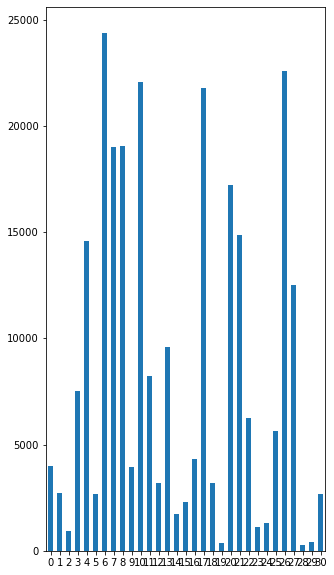

In [6]:
train_values['geo_level_1_id'].value_counts().sort_index().plot.bar(figsize=(5,10), rot=0)

In [ ]:
Decimos quedarnos con todos los features porque el feature enginering dependeria del modelo final que eligieramos.
Mientras tanto para evitar usar categoricos usamos get_dummies (alguna justificacion de que se parece one_hot encoding y porque no usamos otro enconding)

In [7]:
set = pd.get_dummies(train_values) #y bueno asi quedo el setd e datos con el que probamos los primeros modelos
set.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,802906,6,487,12198,2,30,6,5,1,1,...,0,0,0,0,0,0,0,0,1,0
1,28830,8,900,2812,2,10,8,7,0,1,...,0,0,0,0,0,0,0,0,1,0
2,94947,21,363,8973,2,10,5,5,0,1,...,0,0,0,0,0,0,0,0,1,0
3,590882,22,418,10694,2,10,6,5,0,1,...,0,0,0,0,0,0,0,0,1,0
4,201944,11,131,1488,3,30,8,9,1,0,...,0,0,0,0,0,0,0,0,1,0


#Modelos

In [ ]:
Decimos que probamos randomforest y nos dio 

In [ ]:
## Busqueda de los mejores Hiperparametros con Random
n_estimators=np.arange(10,110,10)
max_depth=np.arange(2,22,4)
min_samples_split=np.arange(1,11,1)
min_samples_leaf=np.arange(1,11,1)

param={'n_estimators':n_estimators,'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

clf=RandomForestClassifier()

kf=KFold(n_splits=2,shuffle=True)

rs=RandomizedSearchCV(clf,param_distributions=param,cv=kf,scoring='f1_micro')

In [ ]:
y nos dio 0.6871 y decimos probar con gridsearch para la bsuqueda de hiperparametros

In [ ]:
pipe = make_pipeline(StandardScaler(), 
                     RandomForestClassifier(random_state=123))
pipe

param_grid = {'randomforestclassifier__n_estimators': [200, 1000],
              'randomforestclassifier__min_samples_leaf': [1, 12],
              'randomforestclassifier__min_samples_split': [2, 12],
              'randomforestclassifier__max_depth': [1, 25]
             }

gs = GridSearchCV(pipe, param_grid)


In [ ]:
clf=RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=25)
clf.fit(X,y)

In [ ]:
y con esta bsuqueda conseguimos 0.7110, la mejora que se vio fue proque grid es mas preciso... y boludeces

In [ ]:
Despues nos pasamos a los modelos de boosting, empezando con catboost y de base conseguimos 0.7247 por lo que decidios intenatr mejorar este y probar otros modelos de boost


In [ ]:
Catboost buscando hierparametros con random y sacando la columna 'building_id', ya que nos parecia un feature sin peso a la hora de predecir ya q es id unico... (seguir chamuyo)

In [ ]:
Siguiendo con los modelos de boost probamos xgboost que de base nos dio 0.7401 (chequear) y luego de tocar los hiperparametros con varios randomsearch
logramos llegar a 0.7475

In [ ]:
Estabamos trabados 0.7475 y se nos ocurrio ver el plot_importance del modelo y observamos que la columna 'building_id' tenia el mayor peso en el modelo, por lo que al no poder eliminarla en el setd e entrenamiento decidimos vovler todos sus valores 0 y asi reducir su importancia en el modelo
con esto logramos los 0.7515 finales.

In [ ]:
Tambien programos lightgbm que de base nos dio 0.6691 y buscando los hiperparametros con random nos dio...

In [ ]:
Una vez conseguido este modelo final de xgboost probamos hacer bagging pero no obtuvimos mejores resultados

In [ ]:
#Feature enginneering

In [ ]:
Aca nose, tenemos que poner que tipo vimos de poner 2 features mas
volume_percentage = area_percentage * height_percentage / 100
height_percentage_per_floor = height_percentage / count_floors_pre_eq
cantidad de materiales por edificio
epicentro if 17 o 18 

en ambos casos los features no mejoraban el score final sino que lo empeoraban (aca fijense de agarra si se les ocurre algun feature y probemos si mejora o empeora el score final)